In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
X, y =load_diabetes(return_X_y=True)

In [5]:
X_df = pd.DataFrame(X)
X_df = X_df.rename(columns={0: 'age', 1: 'sex', 2: 'bmi', 3: 'bp', 4: 'tc', 5: 'ldl', 6: 'hdl', 7: 'tch', 8: 'ltg', 9: 'glu'})
data_source = X_df.copy()
data_source['diabetes'] = y
data_source

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


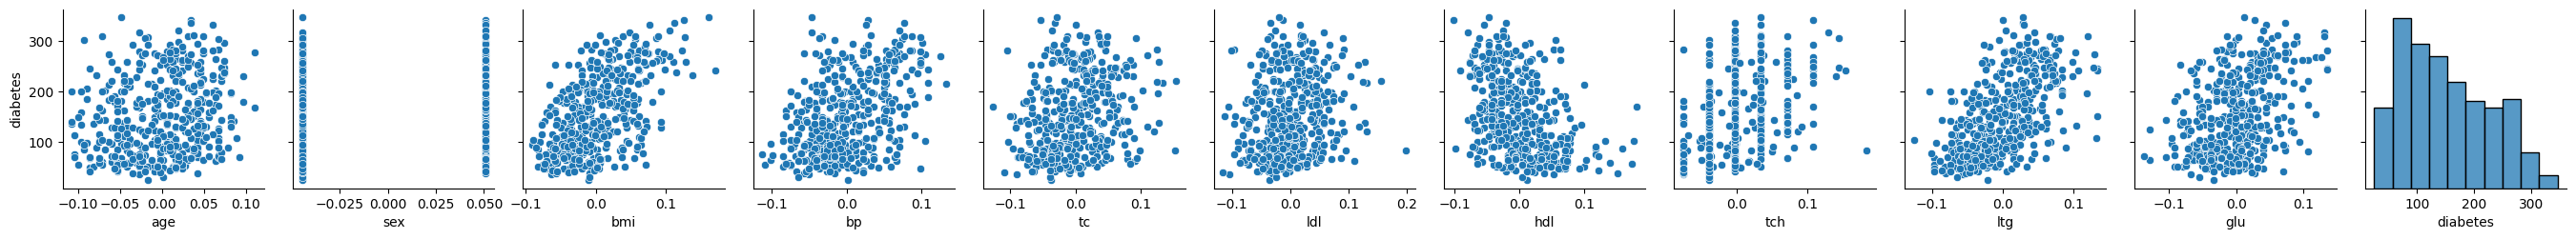

In [7]:
sns.pairplot(data_source, y_vars=['diabetes'])

<AxesSubplot: >

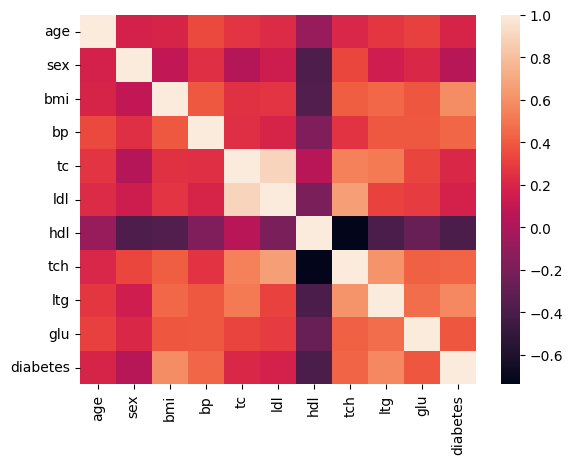

In [8]:
sns.heatmap(data_source.corr())

In [14]:
data_source.corr()['diabetes']

age         0.187889
sex         0.043062
bmi         0.586450
bp          0.441482
tc          0.212022
ldl         0.174054
hdl        -0.394789
tch         0.430453
ltg         0.565883
glu         0.382483
diabetes    1.000000
Name: diabetes, dtype: float64

In [9]:
data = data_source.copy()
data_train, data_validation = train_test_split(data, test_size=0.33, random_state=42)

In [10]:
data_train.shape

(296, 11)

<AxesSubplot: xlabel='bmi', ylabel='diabetes'>

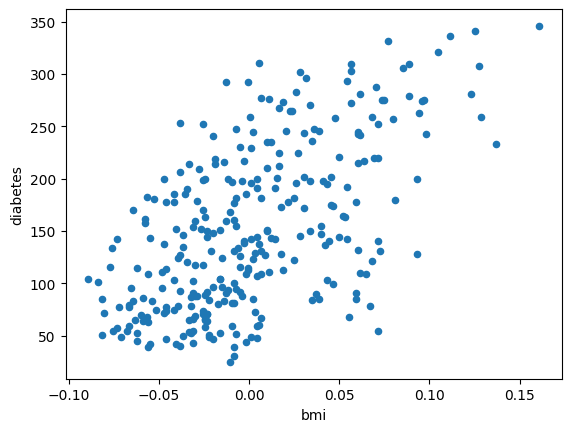

In [11]:
data_train.plot(x='bmi', y='diabetes', kind='scatter')


## Simple linear regression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(data[['bmi']], data[['diabetes']])

LinearRegression()

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


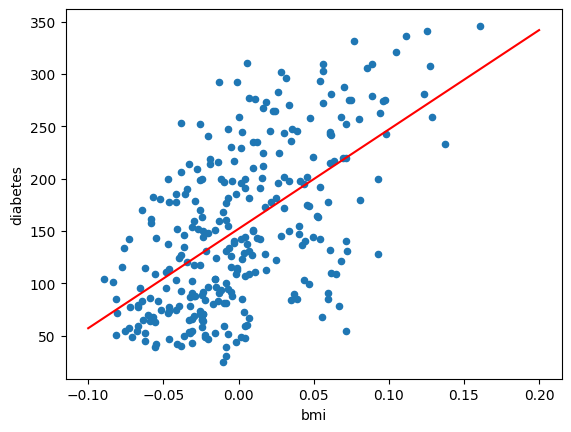

In [18]:
# Fitted line and training data
data_train.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.1, .2, 0.05), lr.predict(np.arange(-0.1, .2, 0.05).reshape(-1, 1)), color='red')

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


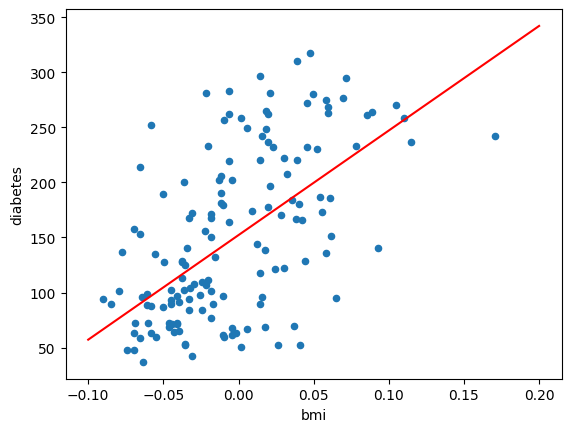

In [19]:
# Fitted line and test data
data_validation.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.1, .2, 0.05), lr.predict(np.arange(-0.1, .2, 0.05).reshape(-1, 1)), color='red')

In [20]:
lr.coef_

array([[949.43526038]])

In [21]:
lr.intercept_

array([152.13348416])

In [22]:
# RMSE on train data
mean_squared_error(data_train['bmi'], lr.predict(data_train[['bmi']]), squared=False)

160.28562405594653

In [23]:
# RMSE on validation data
mean_squared_error(data_validation['bmi'], lr.predict(data_validation[['bmi']]), squared=False)

155.37764115433612

## High order linear regression

Let's fit a high order polynomial to the data. While we usually do not go above order 3 or 4, we want to see what happens if we use a much higher order such as 8.

In [24]:
pf = PolynomialFeatures(degree=8, include_bias=False)

In [32]:
X_high = pf.fit_transform(data_train[['bmi']])
X_high

array([[-3.09956318e-02,  9.60729193e-04, -2.97784084e-05, ...,
         8.86753604e-10, -2.74854882e-11,  8.51930074e-13],
       [ 5.41515220e-02,  2.93238734e-03,  1.58793237e-04, ...,
         2.52152922e-08,  1.36544645e-09,  7.39410035e-11],
       [-5.12814206e-03,  2.62978410e-05, -1.34859065e-07, ...,
         1.81869673e-14, -9.32653520e-17,  4.78277975e-19],
       ...,
       [-2.02175111e-02,  4.08747755e-04, -8.26386227e-06, ...,
         6.82914196e-11, -1.38068253e-12,  2.79139645e-14],
       [-2.34509473e-02,  5.49946930e-04, -1.28967765e-05, ...,
         1.66326844e-10, -3.90052205e-12,  9.14709371e-14],
       [ 2.82840322e-02,  7.99986479e-04,  2.26268434e-05, ...,
         5.11974040e-10,  1.44806903e-11,  4.09572310e-13]])

In [33]:
X_high.shape

(296, 8)

In [34]:
pf.powers_

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]], dtype=int64)

In [35]:
lr_high = LinearRegression()

In [36]:
lr_high.fit(X_high, data_train['diabetes'])

LinearRegression()

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


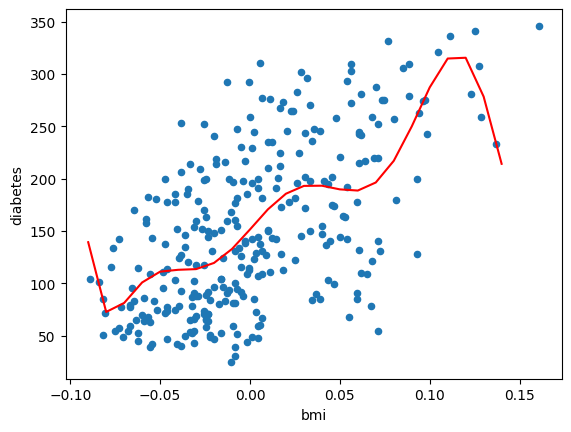

In [37]:
# Fitted line and training data
data_train.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.09, .15, 0.01), lr_high.predict(pf.transform(np.arange(-0.09, .15, 0.01).reshape(-1, 1))), color='red')

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


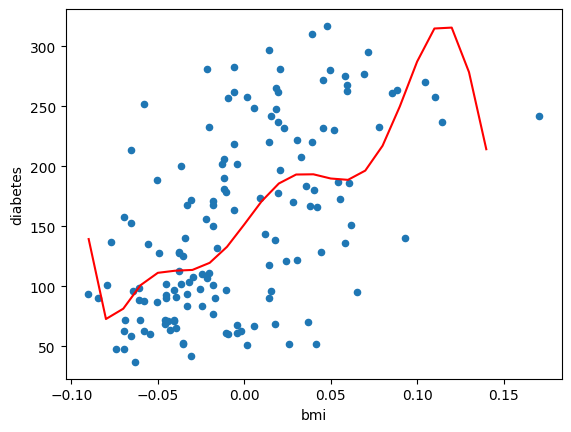

In [38]:
# Fitted line and test data
data_validation.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.09, .15, 0.01), lr_high.predict(pf.transform(np.arange(-0.09, .15, 0.01).reshape(-1, 1))), color='red')

In [39]:
lr_high.coef_

array([ 1.98282957e+03,  3.13751407e+03, -9.04617190e+05, -9.14882560e+05,
        2.05858806e+08, -3.54655058e+08, -1.42018542e+10,  6.18436621e+10])

In [40]:
lr_high.intercept_

151.54901131998457

In [41]:
# RMSE on train data
mean_squared_error(data_train['bmi'], lr_high.predict(pf.transform(data_train[['bmi']])), squared=False)

159.4096182298037

In [42]:
# RMSE on validation data
mean_squared_error(data_validation['bmi'], lr_high.predict(pf.transform(data_validation[['bmi']])), squared=False)

173.52303753429027

## Ridge regression

In [43]:
ri = Ridge(alpha=0.1)

In [44]:
ri.fit(X_high, data_train['diabetes'])

Ridge(alpha=0.1)

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


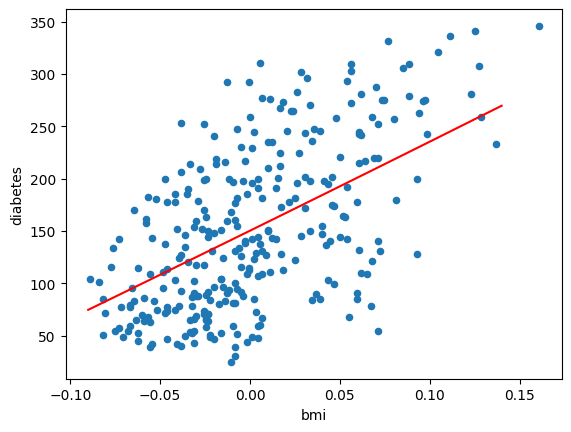

In [45]:
# Fitted line and training data
data_train.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.09, .15, 0.01), ri.predict(pf.transform(np.arange(-0.09, .15, 0.01).reshape(-1, 1))), color='red')

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


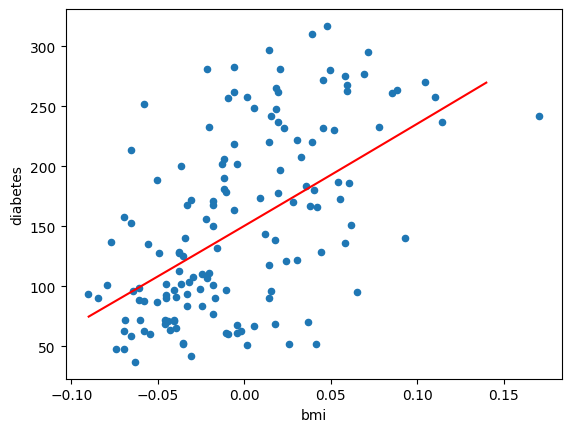

In [46]:
# Fitted line and test data
data_validation.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.09, .15, 0.01), ri.predict(pf.transform(np.arange(-0.09, .15, 0.01).reshape(-1, 1))), color='red')

In [47]:
ri.coef_

array([8.44863589e+02, 5.49935796e+01, 8.10043362e+00, 9.94512793e-01,
       1.32170504e-01, 1.79320535e-02, 2.49076869e-03, 3.59948796e-04])

In [48]:
ri.intercept_

150.3639268571385

In [49]:
# RMSE on train data
mean_squared_error(data_train['bmi'], ri.predict(pf.transform(data_train[['bmi']])), squared=False)

157.21040531139374

In [50]:
# RMSE on validation data
mean_squared_error(data_validation['bmi'], ri.predict(pf.transform(data_validation[['bmi']])), squared=False)

152.80721933069796

## Lasso regression

In [51]:
ls = Lasso(alpha=0.1)

In [52]:
ls.fit(X_high, data_train['diabetes'])

Lasso(alpha=0.1)

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


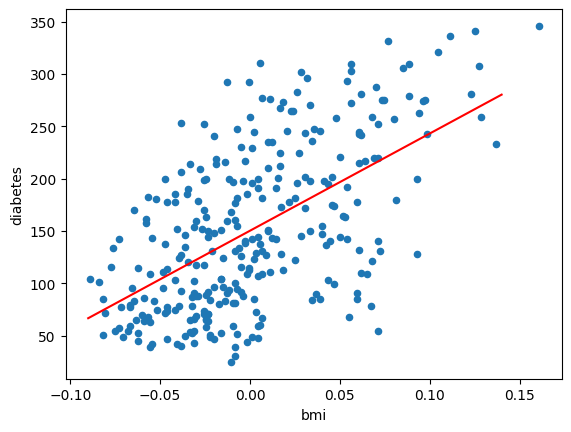

In [53]:
# Fitted line and training data
data_train.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.09, .15, 0.01), ls.predict(pf.transform(np.arange(-0.09, .15, 0.01).reshape(-1, 1))), color='red')

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


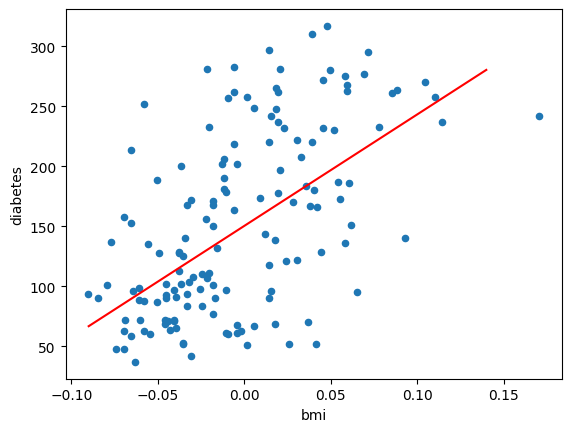

In [54]:
# Fitted line and test data
data_validation.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.09, .15, 0.01), ls.predict(pf.transform(np.arange(-0.09, .15, 0.01).reshape(-1, 1))), color='red')

In [55]:
ls.coef_

array([928.64620872,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [56]:
# RMSE on train data
mean_squared_error(data_train['bmi'], ls.predict(pf.transform(data_train[['bmi']])), squared=False)

158.2526429616932

In [57]:
# RMSE on validation data
mean_squared_error(data_validation['bmi'], ls.predict(pf.transform(data_validation[['bmi']])), squared=False)

153.4486425182899

## How to improve the model further
There are multiple parameters we can change and see if the RMSE on the validation set can be lowered. For example:
- We can use other features in the model. Features such as *hdl*, *ltg*, and *glu* seemed to have a considerable correlation with the output.
- We can add the interaction terms between features included in the model. We can use *PolynomialFeatures* for that as well.
- We can modify the alpha of the regularization term for Ridge and Lasso regressions.